In [76]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import collections

In [77]:
energy_df = pd.read_csv("all_energy_statistics.csv")
energy_df.head()

,country_or_area,commodity_transaction,year,unit,quantity,quantity_footnotes,category
0,Austria,Additives and Oxygenates - Exports,1996,"Metric tons, thousand",5.0,NaN,additives_and_oxygenates
1,Austria,Additives and Oxygenates - Exports,1995,"Metric tons, thousand",17.0,NaN,additives_and_oxygenates
2,Belgium,Additives and Oxygenates - Exports,2014,"Metric tons, thousand",0.0,NaN,additives_and_oxygenates
3,Belgium,Additives and Oxygenates - Exports,2013,"Metric tons, thousand",0.0,NaN,additives_and_oxygenates
4,Belgium,Additives and Oxygenates - Exports,2012,"Metric tons, thousand",35.0,NaN,additives_and_oxygenates


In [78]:
# identify the types of objects in the data frame
energy_df.info()

# data is missing from the quantity footnotes column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1189482 entries, 0 to 1189481
Data columns (total 7 columns):
country_or_area          1189482 non-null object
commodity_transaction    1189482 non-null object
year                     1189482 non-null int64
unit                     1189482 non-null object
quantity                 1189482 non-null float64
quantity_footnotes       163946 non-null float64
category                 1189482 non-null object
dtypes: float64(2), int64(1), object(4)
memory usage: 63.5+ MB


In [79]:
# find number of unique values in each column
print(f"Number of Unique Countries {energy_df.country_or_area.nunique()}")
print(f"Number of Unique Products {energy_df.category.nunique()}")
print(f"Number of Unique Transactions {energy_df.commodity_transaction.nunique()}")
print(f"Different Units of Measure {energy_df.unit.nunique()}")
print(f"Different FootNote Values {energy_df.quantity_footnotes.nunique()}")

Number of Unique Countries 243
Number of Unique Products 71
Number of Unique Transactions 2452
Different Units of Measure 6
Different FootNote Values 1


# Find total quantity of product involved in energy

In [80]:
total_energy = energy_df.groupby(['category', 'unit']).mean().round(2).drop(['year', 'quantity_footnotes'], axis=1)
total_energy.head()

,,quantity
category,unit,
additives_and_oxygenates,"Metric tons, thousand",355.34
animal_waste,Terajoules,50930.30
anthracite,"Metric tons, thousand",534.20
aviation_gasoline,"Metric tons, thousand",18.19
bagasse,"Metric tons, thousand",3815.99


In [81]:
# reset index to plot quantity against products
total_energy = total_energy.reset_index()

In [82]:
total_energy = total_energy.sort_values(by=['quantity'], ascending=False)
total_energy.head()

,category,unit,quantity
11,brown_coal,"Metric tons, thousand",1967868.84
30,hard_coal,"Metric tons, thousand",1694778.49
41,natural_gas_including_lng,Terajoules,1343446.28
57,peat,"Metric tons, thousand",736122.47
17,conventional_crude_oil,"Metric tons, thousand",253327.06


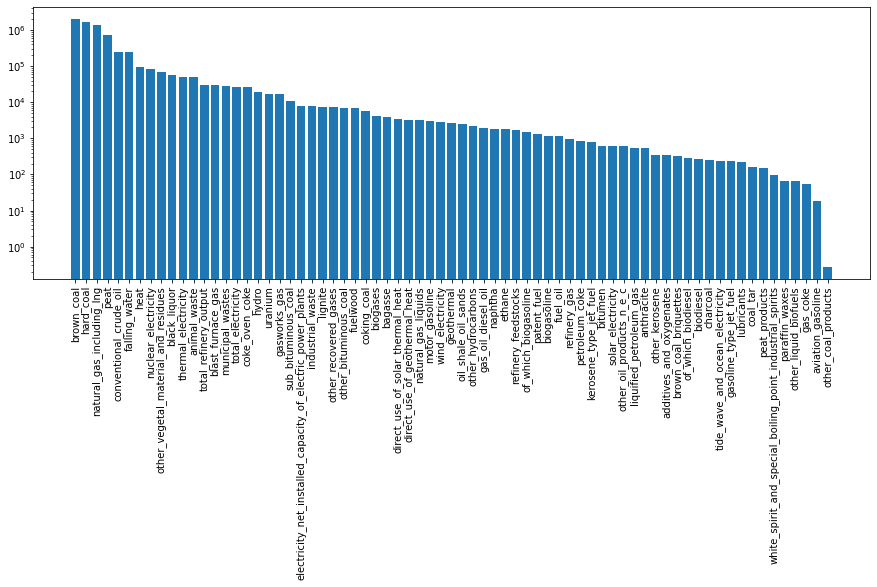

In [83]:
plt.figure(figsize=(15,5))

plt.bar(total_energy['category'], total_energy['quantity'])
plt.xticks(rotation=90)
plt.yscale('log')

plt.show()

# The graph above shows how much of each product has been produced, transformed, exported, imported, and/or consumed from 1990 to 2014 in any country. This is very general and does not provide much information.

<h2>Need to break down this data into sections
       <br>
       <br>*Products_Class
       <br>*Consumption
       <br>*Transformation Processes</h2>


# Product Classes

In [84]:
# Drop FootNote Column
energy_df = energy_df.drop(['quantity_footnotes'], axis=1)

# Rename category column to product and add empty column named product class
energy_df = energy_df.rename(columns={"category":"product"})
energy_df["product_class"] = ''

In [85]:
energy_df.head()

,country_or_area,commodity_transaction,year,unit,quantity,product,product_class
0,Austria,Additives and Oxygenates - Exports,1996,"Metric tons, thousand",5.0,additives_and_oxygenates,
1,Austria,Additives and Oxygenates - Exports,1995,"Metric tons, thousand",17.0,additives_and_oxygenates,
2,Belgium,Additives and Oxygenates - Exports,2014,"Metric tons, thousand",0.0,additives_and_oxygenates,
3,Belgium,Additives and Oxygenates - Exports,2013,"Metric tons, thousand",0.0,additives_and_oxygenates,
4,Belgium,Additives and Oxygenates - Exports,2012,"Metric tons, thousand",35.0,additives_and_oxygenates,


In [64]:
energy_df[energy_df['commodity_transaction'].str.contains("total")].head()

,country_or_area,commodity_transaction,year,unit,quantity,product,product_class
121826,Albania,Lignite brown coal - total known reserves,2014,"Metric tons, thousand",727000.0,brown_coal,Coal_Peat_or_Oil_Shales
121827,Albania,Lignite brown coal - total known reserves,2005,"Metric tons, thousand",794000.0,brown_coal,Coal_Peat_or_Oil_Shales
121828,Albania,Lignite brown coal - total known reserves,2002,"Metric tons, thousand",712000.0,brown_coal,Coal_Peat_or_Oil_Shales
121829,Albania,Lignite brown coal - total known reserves,2001,"Metric tons, thousand",712000.0,brown_coal,Coal_Peat_or_Oil_Shales
121830,Albania,Lignite brown coal - total known reserves,2000,"Metric tons, thousand",712000.0,brown_coal,Coal_Peat_or_Oil_Shales


In [65]:
energy_df[energy_df['commodity_transaction'].str.contains("Total")].head()

,country_or_area,commodity_transaction,year,unit,quantity,product,product_class
1300,Argentina,Additives and Oxygenates - Total energy supply,2014,"Metric tons, thousand",369.0,additives_and_oxygenates,Oil
1301,Argentina,Additives and Oxygenates - Total energy supply,2013,"Metric tons, thousand",379.0,additives_and_oxygenates,Oil
1302,Argentina,Additives and Oxygenates - Total energy supply,2012,"Metric tons, thousand",393.0,additives_and_oxygenates,Oil
1303,Argentina,Additives and Oxygenates - Total energy supply,2011,"Metric tons, thousand",355.0,additives_and_oxygenates,Oil
1304,Argentina,Additives and Oxygenates - Total energy supply,2010,"Metric tons, thousand",418.0,additives_and_oxygenates,Oil


In [86]:
# Need to convert all string to lower
energy_df['country_or_area'] = energy_df['country_or_area'].str.lower()
energy_df['commodity_transaction'] = energy_df['commodity_transaction'].str.lower()
energy_df['product'] = energy_df['product'].str.lower()

In [88]:
energy_df.head()

,country_or_area,commodity_transaction,year,unit,quantity,product,product_class
0,austria,additives and oxygenates - exports,1996,"Metric tons, thousand",5.0,additives_and_oxygenates,
1,austria,additives and oxygenates - exports,1995,"Metric tons, thousand",17.0,additives_and_oxygenates,
2,belgium,additives and oxygenates - exports,2014,"Metric tons, thousand",0.0,additives_and_oxygenates,
3,belgium,additives and oxygenates - exports,2013,"Metric tons, thousand",0.0,additives_and_oxygenates,
4,belgium,additives and oxygenates - exports,2012,"Metric tons, thousand",35.0,additives_and_oxygenates,


In [89]:
# Create lists of product classes to compare products against
Oil_Class = ['additives_and_oxygenates', 'paraffin_waxes', 'conventional_crude_oil', 'natural_gas_liquids','other_hydrocarbons','aviation_gasoline','motor_gasoline','biogasoline','of_which_biogasoline','gasoline_type_jet_fuel','kerosene_type_jet_fuel','other_kerosene','gas_oil_diesel_oil','of_which_biodiesel','biodiesel','fuel_oil','liquified_petroleum_gas','refinery_feedstocks','naphtha','white_spirit_and_special_boiling_point_industrial_spirits','lubricants','bitumen','paraffin_waxes','petroleum_coke','refinery_gas','ethane','other_oil_products_n_e_c']
Coal_Peat_Oil_Shales_Class = ['hard_coal','anthracite','coking_coal','other_bituminous_coal','brown_coal','sub_bituminous_coal','lignite','peat','oil_shale_oil_sands','coke_oven_coke','gas_coke','patent_fuel','brown_coal_briquettes','peat_products','coal_tar','other_coal_products']
Natural_Manufactured_Recovered_Gas_Class = ['natural_gas_including_lng','gasworks_gas','coke_oven_gas','blast_furnace_gas','other_recovered_gases']
Electricity_Class = ['electricity_net_installed_capacity_of_electric_power_plants','electricity', 'hydro','nuclear_electricity','solar_electricity','thermal_electricity','tide_wave_and_ocean_electricity','total_electricity','total_refinery_output','wind_electricity','falling_water','geothermal']
Heat_Class = ['heat','direct_use_of_geothermal_heat','direct_use_of_solar_thermal_heat']
Biofuels_Waste_Class = ['fuelwood','charcoal','bagasse','animal_waste','other_vegetal_material_and_residues','municipal_wastes','industrial_waste','black_liquor','biogasoline','biodiesels','bio_jet_kerosene','other_liquid_biofuels','biogases','uranium']


In [90]:
energy_df.loc[energy_df["product"] == "geothermal"]

,country_or_area,commodity_transaction,year,unit,quantity,product,product_class
490912,australia,electricity - total geothermal production,2014,"Kilowatt-hours, million",1.0,geothermal,
490913,australia,electricity - total geothermal production,2013,"Kilowatt-hours, million",1.0,geothermal,
490914,australia,electricity - total geothermal production,2012,"Kilowatt-hours, million",1.0,geothermal,
490915,australia,electricity - total geothermal production,2011,"Kilowatt-hours, million",1.0,geothermal,
490916,australia,electricity - total geothermal production,2010,"Kilowatt-hours, million",1.0,geothermal,
...,...,...,...,...,...,...,...
491403,united states,electricity - total geothermal production,1991,"Kilowatt-hours, million",16267.0,geothermal,
491404,united states,electricity - total geothermal production,1990,"Kilowatt-hours, million",16012.0,geothermal,
491405,ussr (former),electricity - total geothermal production,1991,"Kilowatt-hours, million",30.0,geothermal,
491406,ussr (former),electricity - total geothermal production,1990,"Kilowatt-hours, million",28.0,geothermal,


In [91]:
energy_dict = energy_df.to_dict()

In [92]:
def product_class(x,y):
    for product in energy_dict['product']:
        for products in x:
            if energy_dict['product'][product] == products:
                energy_dict['product_class'][product] = y

In [93]:
product_class(Oil_Class, 'Oil')
product_class(Coal_Peat_Oil_Shales_Class, 'Coal_Peat_or_Oil_Shales')
product_class(Natural_Manufactured_Recovered_Gas_Class, 'Natural_Manufactured_or_Recovered_Gas')
product_class(Electricity_Class, 'Electricity')
product_class(Heat_Class, 'Heat')
product_class(Biofuels_Waste_Class, "Biofuels_Waste")

In [94]:
# checking to see if function works
print(energy_dict['product_class'][170962])
print(energy_dict['product_class'][170960])
print(energy_dict['product_class'][84807])
print(energy_dict['product_class'][204398])
print(energy_dict['product_class'][198314])
print(energy_dict['product_class'][332737])

Oil
Coal_Peat_or_Oil_Shales
Natural_Manufactured_or_Recovered_Gas
Electricity
Heat
Biofuels_Waste


In [95]:
# check to ensure no empty strings
for product in energy_dict['product_class']:
    if energy_dict['product_class'][product] == '':
        print(energy_dict['product'][product])


In [96]:
energy_df = pd.DataFrame.from_dict(energy_dict)

In [97]:
energy_df.tail()

,country_or_area,commodity_transaction,year,unit,quantity,product,product_class
1189477,viet nam,electricity - total wind production,2012,"Kilowatt-hours, million",92.0,wind_electricity,Electricity
1189478,viet nam,electricity - total wind production,2011,"Kilowatt-hours, million",87.0,wind_electricity,Electricity
1189479,viet nam,electricity - total wind production,2010,"Kilowatt-hours, million",50.0,wind_electricity,Electricity
1189480,viet nam,electricity - total wind production,2009,"Kilowatt-hours, million",10.0,wind_electricity,Electricity
1189481,viet nam,electricity - total wind production,2008,"Kilowatt-hours, million",1.0,wind_electricity,Electricity


In [100]:
# create dataframe for each of the product classes
Oil_df = energy_df[energy_df['product_class'] == 'Oil']
Coal_Peat_or_Oil_Shalesoil_df = energy_df[energy_df['product_class'] == 'Coal_Peat_or_Oil_Shales']
Natural_Manufactured_or_Recovered_Gas_df = energy_df[energy_df['product_class'] == 'Natural_Manufactured_or_Recovered_Gas']
Electricity_df = energy_df[energy_df['product_class'] == 'Electricity']
Heat_df = energy_df[energy_df['product_class'] == 'Heat']
Biofuels_Waste_df = energy_df[energy_df['product_class'] == 'Biofuels_Waste']


In [101]:
# find all unique units from each dataframe to ensure all comparisons are valid

print(Oil_df.unit.unique())
print(Coal_Peat_or_Oil_Shalesoil_df.unit.unique())
print(Natural_Manufactured_or_Recovered_Gas_df.unit.unique())
print(Electricity_df.unit.unique())
print(Heat_df.unit.unique())
print(Biofuels_Waste_df.unit.unique())


['Metric tons,  thousand']
['Metric tons,  thousand' 'Terajoules']
['Terajoules']
['Kilowatts,  thousand' 'Kilowatt-hours, million' 'Metric tons,  thousand']
['Terajoules']
['Terajoules' 'Metric tons,  thousand' 'Cubic metres, thousand'
 'Metric Tons']


In [102]:
# Oil, Natural Gas, and Heat dataframes all have one unit of measure
# Coal Peat and Shale has mass and energy units of measure, respectively
# Electricity has power, energy, and mass units of measure, respectivey
# Biofuels and Waste has energy, two mass units (separated by 3 orders of magnitude), and volume units of measure, respectivey

In [113]:
Coal_Peat_or_Oil_Shalesoil_df.head()

,country_or_area,commodity_transaction,year,unit,quantity,product,product_class
4940,bulgaria,anthracite - commerce and public services,2014,"Metric tons, thousand",2.0,anthracite,Coal_Peat_or_Oil_Shales
4941,bulgaria,anthracite - commerce and public services,2013,"Metric tons, thousand",4.0,anthracite,Coal_Peat_or_Oil_Shales
4942,bulgaria,anthracite - commerce and public services,2012,"Metric tons, thousand",2.0,anthracite,Coal_Peat_or_Oil_Shales
4943,bulgaria,anthracite - commerce and public services,2011,"Metric tons, thousand",2.0,anthracite,Coal_Peat_or_Oil_Shales
4944,bulgaria,anthracite - commerce and public services,2010,"Metric tons, thousand",2.0,anthracite,Coal_Peat_or_Oil_Shales


In [106]:
# find all unique transactions
Coal_Peat_or_Oil_Shalesoil_df['commodity_transaction'].unique()

array(['anthracite - commerce and public services',
       'anthracite - consumption by agriculture, forestry and fishing',
       'anthracite - consumption by chemical and petrochemical',
       'anthracite - consumption by construction',
       'anthracite - consumption by food and tobacco',
       'anthracite - consumption by iron and steel',
       'anthracite - consumption by machinery',
       'anthracite - consumption by manufacturing, construction and non-fuel industry',
       'anthracite - consumption by mining and quarrying',
       'anthracite - consumption by non-ferrous metals',
       'anthracite - consumption by non-metallic minerals',
       'anthracite - consumption by other',
       'anthracite - consumption by other manuf., const. and non-fuel ind.',
       'anthracite - consumption by paper, pulp and print',
       'anthracite - consumption by rail',
       'anthracite - consumption by textile and leather',
       'anthracite - consumption by wood and wood products

In [107]:
# find total energy supply for each product in Coal_Peat_Oil_Shale(CPO) Class
Coal_Peat_or_Oil_Shalesoil_df[Coal_Peat_or_Oil_Shalesoil_df['commodity_transaction'].str.contains("total energy")].head()

,country_or_area,commodity_transaction,year,unit,quantity,product,product_class
8858,armenia,anthracite - total energy supply,2014,"Metric tons, thousand",0.55,anthracite,Coal_Peat_or_Oil_Shales
8859,armenia,anthracite - total energy supply,2013,"Metric tons, thousand",0.84,anthracite,Coal_Peat_or_Oil_Shales
8860,armenia,anthracite - total energy supply,2012,"Metric tons, thousand",2.15,anthracite,Coal_Peat_or_Oil_Shales
8861,armenia,anthracite - total energy supply,2011,"Metric tons, thousand",0.49,anthracite,Coal_Peat_or_Oil_Shales
8862,armenia,anthracite - total energy supply,2010,"Metric tons, thousand",1.87,anthracite,Coal_Peat_or_Oil_Shales


In [154]:
cpo_production = Coal_Peat_or_Oil_Shalesoil_df[Coal_Peat_or_Oil_Shalesoil_df['commodity_transaction'].str.contains("production")]

In [177]:
cpo_production

,country_or_area,commodity_transaction,year,unit,quantity,product,product_class
8430,australia,anthracite - production,2014,"Metric tons, thousand",14.0,anthracite,Coal_Peat_or_Oil_Shales
8431,australia,anthracite - production,2013,"Metric tons, thousand",361.0,anthracite,Coal_Peat_or_Oil_Shales
8432,australia,anthracite - production,2012,"Metric tons, thousand",578.0,anthracite,Coal_Peat_or_Oil_Shales
8433,australia,anthracite - production,2011,"Metric tons, thousand",604.0,anthracite,Coal_Peat_or_Oil_Shales
8434,australia,anthracite - production,2010,"Metric tons, thousand",329.0,anthracite,Coal_Peat_or_Oil_Shales
...,...,...,...,...,...,...,...
1030126,united states,sub-bituminous coal - production,1994,"Metric tons, thousand",272629.0,sub_bituminous_coal,Coal_Peat_or_Oil_Shales
1030127,united states,sub-bituminous coal - production,1993,"Metric tons, thousand",249390.0,sub_bituminous_coal,Coal_Peat_or_Oil_Shales
1030128,united states,sub-bituminous coal - production,1992,"Metric tons, thousand",228758.0,sub_bituminous_coal,Coal_Peat_or_Oil_Shales
1030129,united states,sub-bituminous coal - production,1991,"Metric tons, thousand",231631.0,sub_bituminous_coal,Coal_Peat_or_Oil_Shales


In [157]:
cpo_production.unit.unique()
# Need to separate produced products measured in Metric tons form Terajoules or convert Terajoules of energy to Metric tons

array(['Metric tons,  thousand', 'Terajoules'], dtype=object)

In [182]:
cpo_production[cpo_production['unit'] == 'Terajoules']

,country_or_area,commodity_transaction,year,unit,quantity,product,product_class
159682,algeria,coke oven gas - production,2009,Terajoules,398.0,coke_oven_coke,Coal_Peat_or_Oil_Shales
159683,algeria,coke oven gas - production,2008,Terajoules,825.0,coke_oven_coke,Coal_Peat_or_Oil_Shales
159684,algeria,coke oven gas - production,2007,Terajoules,825.0,coke_oven_coke,Coal_Peat_or_Oil_Shales
159685,algeria,coke oven gas - production,2006,Terajoules,842.0,coke_oven_coke,Coal_Peat_or_Oil_Shales
159686,algeria,coke oven gas - production,2005,Terajoules,886.0,coke_oven_coke,Coal_Peat_or_Oil_Shales
...,...,...,...,...,...,...,...
160604,zimbabwe,coke oven gas - production,1994,Terajoules,4568.0,coke_oven_coke,Coal_Peat_or_Oil_Shales
160605,zimbabwe,coke oven gas - production,1993,Terajoules,2417.0,coke_oven_coke,Coal_Peat_or_Oil_Shales
160606,zimbabwe,coke oven gas - production,1992,Terajoules,3949.0,coke_oven_coke,Coal_Peat_or_Oil_Shales
160607,zimbabwe,coke oven gas - production,1991,Terajoules,5023.0,coke_oven_coke,Coal_Peat_or_Oil_Shales


In [183]:
cpo_production_energy = cpo_production[cpo_production['unit'] == 'Terajoules']

In [184]:
cpo_production_material = cpo_production[cpo_production['unit'] == 'Metric tons,  thousand']

In [187]:
cpo_production_energy.commodity_transaction.unique()
# There is only one product that is reported in terms of energy. 
# Coke oven gas is formed by heating coal to 1100 °C without access of air. The classic composition of coke gas: 
# hydrogen (H2 - 51%), methane (CH4 - 34%), carbon monoxide (CO - 10%), ethylene (C2H4 - 5%)

array(['coke oven gas - production'], dtype=object)

In [188]:
cpo_production_material.commodity_transaction.unique()

array(['anthracite - production', 'brown coal briquettes - production',
       'brown coal - production', 'coal tar - production',
       'coking coal - production', 'gas coke - production',
       'hard coal - production', 'lignite - production',
       'oil shale - production', 'other bituminous coal - production',
       'patent fuel - production', 'peat - production',
       'peat products - production', 'sub-bituminous coal - production'],
      dtype=object)

In [237]:
# cpo_production_energy = cpo_production_energy.groupby(['product']).mean().round(2).drop(['year'], axis=1)
# cpo_production_material = cpo_production_material.groupby(['product']).mean().round(2).drop(['year'], axis=1)
cpo_production = cpo_production.groupby(['product']).mean().round(2).drop(['year'], axis=1)

In [239]:
# cpo_production_energy = cpo_production_energy.reset_index()
# cpo_production_material = cpo_production_material.reset_index()
cpo_production = cpo_production.reset_index()

In [240]:
# cpo_production_energy = cpo_production_energy.sort_values(by=['quantity'], ascending=False)
# cpo_production_material = cpo_production_material.sort_values(by=['quantity'], ascending=False)
cpo_production = cpo_production.sort_values(by=['quantity'], ascending=False)

In [241]:
# plt.figure(figsize=(15,5))

# energy_quantity = cpo_production_energy['quantity']
# energy_products = cpo_production_energy['product']
# material_quantity = cpo_production_material['quantity']
# material_products = cpo_production_material['product']


# produced_material = plt.bar(material_products, material_quantity, label='Material Products')
# plt.xticks(rotation=90)
# plt.xlabel('products')
# plt.ylabel('Produced Material (Metric tons, thousands) \n Produced Energy (Terajoules)')
# plt.title('Avg. Global Production of Coal, Peat, or Oil Shale Material from 1994-2017')
# plt.legend(material_products, energy_products, label='Energy Products')

# produced_energy = plt.bar(energy_products, energy_quantity)
# plt.legend(handles=[produced_material, produced_energy])

# plt.show()

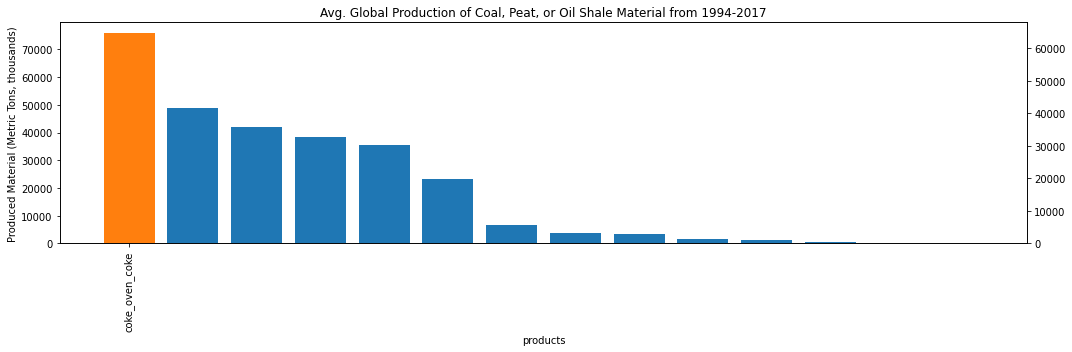

In [244]:
# energy_quantity = cpo_production_energy['quantity']
# energy_products = cpo_production_energy['product']
# material_quantity = cpo_production_material['quantity']
# material_products = cpo_production_material['product']



fig, ax1 = plt.subplots(figsize=(15,5))

color1 = 'tab:blue'

ax1.bar(material_products, material_quantity, color=color1)
ax1.tick_params('x', labelrotation=90)
ax1.set_xlabel('products')
ax1.set_ylabel('Produced Material (Metric Tons, thousands)')
ax1.set_title('Avg. Global Production of Coal, Peat, or Oil Shale Material from 1994-2017')

ax2=ax1.twinx() #instantiate a second axes that shares the same x-axis

color2 = 'tab:orange'
ax2.bar(energy_products, energy_quantity, color=color2)
ax2.set_label('Produced Energy (Terajoules)')
ax2.tick_params(axis='y')

fig.tight_layout()

plt.show()

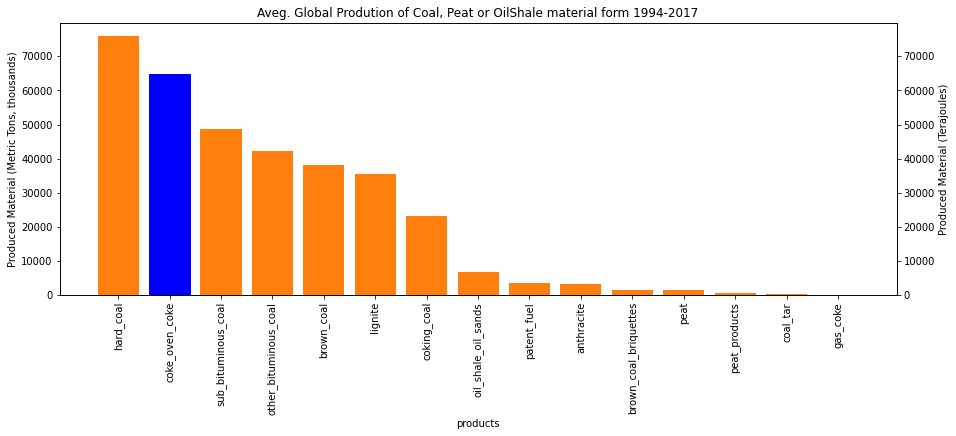

In [271]:
products = cpo_production['product']
quantity = cpo_production['quantity']

fig, ax1 = plt.subplots(figsize=(15,5))


ax1.bar(products, quantity, color='blue')
ax1.tick_params('x', labelrotation=90)
ax1.set_xlabel('products')
ax1.set_ylabel('Produced Material (Metric Tons, thousands)')
ax1.set_title('Aveg. Global Prodution of Coal, Peat or OilShale material form 1994-2017')

ax2=ax1.twinx() #instantiate a second axes that shares the same x-axis
ax2.bar(products, quantity)
ax2.set_ylabel('Produced Material (Terajoules)')

barlist=plt.bar(products, quantity)
barlist[1].set_color('blue')


In [131]:
Coal_Peat_or_Oil_Shalesoil_df.groupby(['country_or_area', 'commodity_transaction']).mean().round(2).drop(['year'], axis=1)

quantity
country_or_area commodity_transaction                                        
afghanistan     coal - additional resources                         400000.00
                coal - recoverable reserves                          66000.00
                coal - total known reserves                          96666.67
                coal - total resources in place                     381666.67
                gas coke - consumption by manufacturing, constr...     116.18
...                                                                       ...
zimbabwe        other bituminous coal - total energy supply           2346.69
                other bituminous coal - transformation                1867.64
                other bituminous coal - transformation in autop...      13.22
                other bituminous coal - transformation in elect...    1867.64
                other bituminous coal - transformation in main ...    1856.82

[10625 rows x 1 columns]